XGBOOST

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



Bad key "text.kerning_factor" on line 4 in
C:\Users\VIPUL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
#APPLYING XGBOOST
from xgboost import XGBClassifier
cls=XGBClassifier()
cls.fit(X_train,y_train)
cls.predict(X_test)


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

90.0 %


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


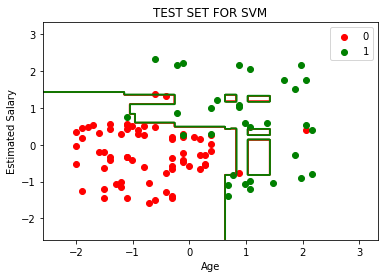

In [10]:
#Accuracy of model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100,'%')
# Visualising the XGBOOST results
from matplotlib.colors import ListedColormap
x_set,y_set= X_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                   np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contour(x1,x2,cls.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_pred)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('TEST SET FOR XGBOOST')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()